In [1]:
from IPython.display import display, Image, HTML
from ipywidgets import Button, Output
import os

path = "Si_nano_muestra_3/"
extetion = ".png"
files = []

for r, d, f in os.walk(path):
    for file in f:
        if extetion in file:
            files.append(r+'/'+file)

# List of image file names
image_files = files

# Current image index
current_image_index = 0

# Output widget to display the image
out = Output()

# Function to update and display the current image
def display_image():
    with out:
        # Clear the output area
        out.clear_output()
        # Get the current image file name
        image_file = image_files[current_image_index]
        # Display the image
        display(Image(retina=True,filename=image_file, metadata={'Title': 'Hello'}))
        # Add the file name to the image
        file_name = os.path.basename(image_file)
        # Display the text next to the image
        text = "<b>" + file_name + "</b>"
        display(HTML("<div style='float: center; font-size: 50px;'><center><br>" + text + "<br>" + text + "<br>" + text + "</center></div>"))

# Button click event handlers
def previous_image(btn):
    global current_image_index
    current_image_index = (current_image_index - 1) % len(image_files)
    display_image()

def next_image(btn):
    global current_image_index
    current_image_index = (current_image_index + 1) % len(image_files)
    display_image()

# Create buttons
previous_button = Button(description='Previous')
previous_button.on_click(previous_image)

next_button = Button(description='Next')
next_button.on_click(next_image)

# Display buttons and output widget
display(previous_button, next_button)
display(out)

# Display initial image
display_image()


Button(description='Previous', style=ButtonStyle())

Button(description='Next', style=ButtonStyle())

Output()

In [1]:
import os

path = "../raman_2"
extetion = ".txt"
files = []

for r, d, f in os.walk(path):
    for file in f:
        if extetion in file:
            files.append(r+'/'+file)

files

['../raman_2/Si_nano_muestra 3_25.txt',
 '../raman_2/Si_nano_muestra 3_16.txt',
 '../raman_2/Si_nano_muestra 3_63.txt',
 '../raman_2/Si_nano_muestra 3_01.txt',
 '../raman_2/Si_nano_muestra 3_64.txt',
 '../raman_2/Si_nano_muestra 3_31.txt',
 '../raman_2/Si_nano_muestra 3_46.txt',
 '../raman_2/Si_nano_muestra 3_59.txt',
 '../raman_2/Si_nano_muestra 3_57.txt',
 '../raman_2/Si_nano_muestra 3_38.txt',
 '../raman_2/Si_nano_muestra 3_62.txt',
 '../raman_2/Si_nano_muestra 3_48.txt',
 '../raman_2/Si_nano_muestra 3_37.txt',
 '../raman_2/Si_nano_muestra 3_34.txt',
 '../raman_2/Si_nano_muestra 3_33.txt',
 '../raman_2/Si_nano_muestra 3_17.txt',
 '../raman_2/Si_nano_muestra 3_65.txt',
 '../raman_2/Si_nano_muestra 3_52.txt',
 '../raman_2/Si_nano_muestra 3_32.txt',
 '../raman_2/Si_nano_muestra 3_60.txt']

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt



class RamanSpectrum:
    # A Class to perform ploting, cutting spectrums in a certain range
    # denoise, baseline and multipeak fit. It needs the path of a 
    # RamanSpectrum of type txt. It should be noted that the format of this txt 
    # may be different for an observation made in another device. But in general the main
    # part is inside the x,y pairs so the read of another type of format can be modified to
    # provide x, and yas an np array in the initialization method.


    def __init__(self, filepath, x=None,y=None):
        # Read in the data from the file or reading the x, y values
        if (x && y)

        with open(filepath, 'r', encoding='iso-8859-1') as f:
            lines = f.readlines()
        
        # Extract the metadata from the file
        self.metadata = {}
        self.dictcoords = {}

        for line in lines:
            if line.startswith("#"):
                # Storing the metadata
                key, value = line.strip().split("=")
                self.metadata[key[1:]] = value.replace('\t', '')
        # Now that we have the metadata stored in a dictionary, we can
        # store the value of the keys in a set of strings

        self.metakeys = self.metadata.keys()
        
        # Extract the x and y data from the file
        data = np.loadtxt(lines[len(self.metadata):])
        self.x = data[:,0]
        self.y = data[:,1]
        self.data = data

        self.sample = self.metadata['Title'].replace(' ', '_')

        if not os.path.exists(self.sample):
            os.makedirs(self.sample)

        for e in self.data:
            self.dictcoords[e[0]] = e[1]
    
    def plot(self):
        plt.plot(self.x, self.y)
        plt.xlabel("Wavenumber (cm$^{-1}$)")
        plt.ylabel("Intensity (counts)")
        plt.show()

    def acces_value(self, pattern):
            matched_keys = set()
            regex = re.compile(pattern, re.IGNORECASE)
            for key in self.metakeys:
                if regex.search(key):
                    matched_keys.add(key)
            return (matched_keys, [self.metadata[key] for key in matched_keys])
    
    def crop(self, lower, upper, show = False):
        self.croppedx = []
        self.croppedy = []
        for e in self.x:
            if e > lower and e < upper:
                self.croppedx.append(e)
                self.croppedy.append(self.dictcoords[e])
        plt.plot(self.croppedx, self.croppedy)
        plt.xlabel("Wavenumber (cm$^{-1}$)")
        plt.ylabel("Intensity (counts)")
        plt.title(self.metadata['Date'])
        # Saving the cropped data as an image

        if not os.path.exists(self.sample+'/cropped'):
            os.makedirs(self.sample+'/cropped')

        name = self.sample+"/cropped/{i}.png".format(i = self.metadata['Date'])
        plt.savefig(name)
        if show:
            plt.show()
        plt.clf()
    
    def sav_gol(self, window, order, fromCropped = True, show=False):
        self.denoisedx = []
        self.denoisedy = []
        if fromCropped:
            self.savgol = savgol_filter(self.croppedy, window, order)
            self.denoisedx = self.croppedx
            self.denoisedy = self.savgol
            plt.plot(self.croppedx, self.savgol)
            plt.xlabel("Wavenumber (cm$^{-1}$)")
            plt.ylabel("Intensity (counts)")
            plt.title(self.metadata['Date'] + 'Denoised')

            if not os.path.exists(self.sample+'/denoised'):
                os.makedirs(self.sample+'/denoised')

            # Saving the cropped data as an image
            name = self.sample + "/denoised/{i}.png".format(i = self.metadata['Date'])
            plt.savefig(name)
            if show:
                plt.show()
            plt.clf()

    def baseline(self,degree = 1, show = False, before=False):
        # Fit polynomial baseline

        xfit = self.denoisedx[:5] + self.denoisedx[-5:]
        self.a = list(self.denoisedy[:5])
        self.b = list(self.denoisedy[-5:])
        
        print(self.a)
        print(self.b)

        yfit = self.a + self.b
        print(type(self.denoisedx),type(self.denoisedy))
        print('The lenghts',len(xfit),len(yfit))

        coefficients = np.polyfit(xfit, yfit, degree)
        baseline = np.polyval(coefficients, self.denoisedx)

        # Plot the original signal and the baseline
        # plt.plot(self.denoisedx, self.denoisedy, label='Original Signal')
        new_zero = abs(min(self.denoisedy - baseline))
        if before:
            plt.plot(self.denoisedx, (self.croppedy + new_zero)  , label='baselined')
            plt.plot(self.denoisedx, baseline, label='Baseline')
        else:
            plt.plot(self.denoisedx, (self.denoisedy + new_zero), label='baselined')
            plt.plot(self.denoisedx, baseline, label='Baseline')
        self.basedx = self.denoisedx
        self.basedy = (self.denoisedy + new_zero) - baseline
        # plt.plot(self.denoisedx, baseline, label='Baseline')
        plt.legend()
        plt.xlabel('wavenumber (cm$^{-1}$)')
        plt.ylabel('Intensity (counts)')

        if not os.path.exists(self.sample+'/baseline'):
            os.makedirs(self.sample+'/baseline')

        plt.title(self.metadata['Date'] + ' - Baseline')
        if show:
            plt.show()
        name = self.sample + "/baseline/{i}.png".format(i = self.metadata['Date'])
        plt.savefig(name)
        plt.clf()
    

    # Define the function as the sum of three Gaussian curves
    def gaussian(self, x, amplitude, center, sigma):
        return amplitude * np.exp(-(x - center)**2 / (2 * sigma**2))

    def multi_peak_fit(self, x, *params):
        num_peaks = len(params) // 3
        y_fit = np.zeros_like(x)
        for i in range(num_peaks):
            amplitude, center, sigma = params[i*3 : (i+1)*3]
            y_fit += self.gaussian(x, amplitude, center, sigma)
        return y_fit


    def get_fitting(self, f2 = 0.5, f3 = 0.3 , c1 = 520, c2 = 500, c3 = 480, s1 = 10, s2 = 20, s3 = 40 ,show = False):
        x = np.array(self.basedx)
        y = np.array(self.basedy)

        yspec = max(y)
        yspec2 = yspec*f2
        yspec3 = yspec*f3

        # Perform the multi-peak fitting
        # initial_guess = [yspec3, 450, 100, yspec2, 510, 10, yspec, 520, 10]
        initial_guess = [yspec3, c3, s3, yspec2, c2, s2, yspec, c1, s1]   # Initial guess for parameters: [amplitude1, center1, sigma1, amplitude2, center2, sigma2, amplitude3, center3, sigma3]
        
        if not os.path.exists(self.sample+'/fit'):
                os.makedirs(self.sample+'/fit')

        try:
            popt, pcov = curve_fit(self.multi_peak_fit, x, y, p0=initial_guess)

            # Extract the optimized parameters
            amplitudes = popt[0::3]
            centers = popt[1::3]
            sigmas = popt[2::3]

            # Print the results

            print('Amplitudes: {}'.format(amplitudes))
            print('Centers: {}'.format(centers))
            print('Sigmas: {}'.format(sigmas))

            # Generate the fitted curve
            x_fit = np.linspace(x.min(), x.max(), 1000)
            y_fit = self.multi_peak_fit(x_fit, *popt)
            # Plot the original data and the fitted curve
            plt.plot(x, y, 'bo', label='Original Data')
            plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve')
            plt.legend()
            plt.xlabel('x')
            plt.ylabel('y')
            if show:
                plt.show()
            plt.savefig(self.sample+'/fit/{}.png'.format(self.metadata['Date']))
            plt.clf()
        except:
            print('Sin ajuste para...')
            print(self.metadata['Date'])


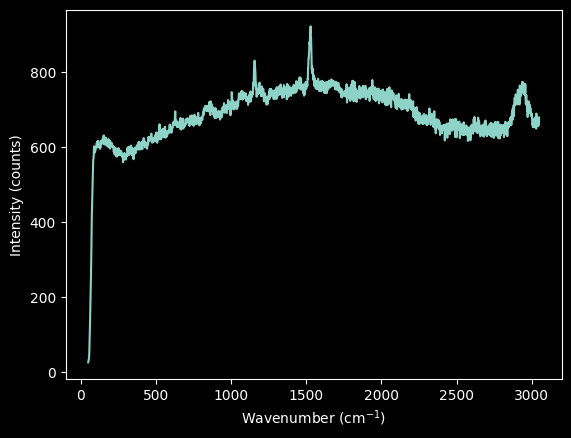

In [3]:
spectrum = RamanSpectrum(files[2])
spectrum.plot()

In [16]:
import numpy as np
import os
path = "../11-05-23"
files = []

for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
            files.append(r+'/'+file)

print(files)

['../11-05-23/CO_12.txt', '../11-05-23/CO_08.txt', '../11-05-23/CO_06.txt', '../11-05-23/CO_03.txt', '../11-05-23/CO_14.txt', '../11-05-23/CO_10.txt', '../11-05-23/CO_09.txt', '../11-05-23/CO_11.txt', '../11-05-23/CO_07.txt', '../11-05-23/CO_01.txt', '../11-05-23/CO_13.txt', '../11-05-23/CO_05.txt', '../11-05-23/CO_02.txt', '../11-05-23/CO_15.txt', '../11-05-23/CO_04.txt']


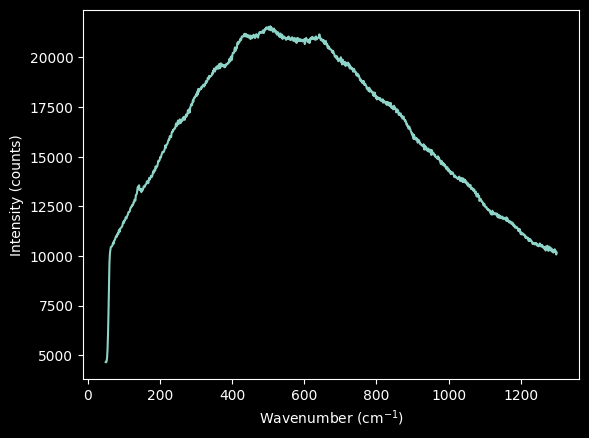

In [17]:
spectrum = RamanSpectrum(files[0])
spectrum.plot()

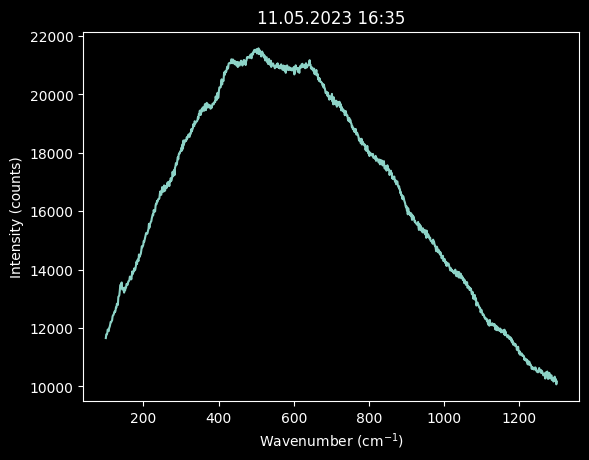

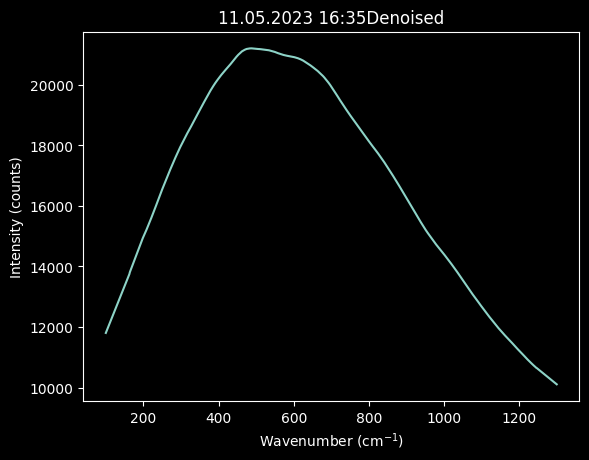

<Figure size 640x480 with 0 Axes>

In [18]:
spectrum.crop(100, 1300, show = True)
spectrum.sav_gol(100, 1, show = True)

gx, gy = np.array(spectrum.denoisedx), np.array(spectrum.denoisedy)

Optimized Amplitude =  41794336.51380542
Optimized Center =  576.1553672252469
Optimized Sigma =  0.021550848688957035
Optimized Gamma =  634.2215520014356


/tmp/ipykernel_1155/2096740886.py:7: RuntimeWarning: overflow encountered in multiply
  return amp * np.real(wofz(((x-cen) + 1j*gam)/sig/np.sqrt(2))) / sig / np.sqrt(2*np.pi)


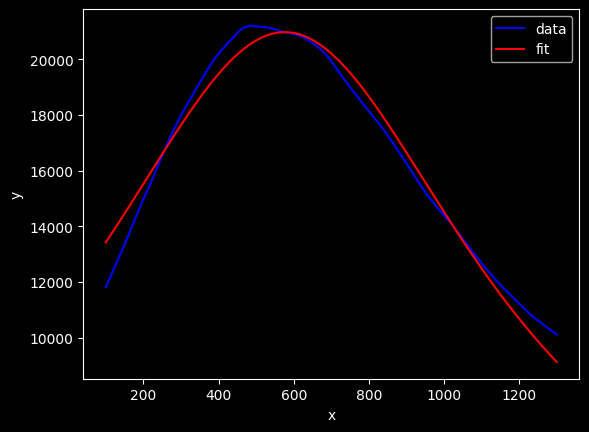

In [19]:
# We use gx and gy to fit this to a voigt profile
# Importing the wofz function from scipy.special

from scipy.special import wofz

def voigt(x, amp, cen, sig, gam):
    return amp * np.real(wofz(((x-cen) + 1j*gam)/sig/np.sqrt(2))) / sig / np.sqrt(2*np.pi)

# We need to define the initial guess for the parameters
center= 580
sigma = 500
gamma = -10
amplitude = 20000

# Now we can fit the data minimizing the difference between the actual data and the model using the curve_fit function from scipy.optimize

from scipy.optimize import curve_fit

# Using the initial parameters we defined above, we can fit the data

def plot_fit(xdata, ydata):
    popt, pcov = curve_fit(voigt, xdata, ydata, p0=[amplitude, center, sigma, gamma])

    # Plot the data and the fit
    plt.plot(xdata, ydata, 'b-', label='data')
    plt.plot(xdata, voigt(xdata, *popt), 'r-', label='fit')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    # Print the optimized parameters
    print('Optimized Amplitude = ', popt[0])
    print('Optimized Center = ', popt[1])
    print('Optimized Sigma = ', popt[2])
    print('Optimized Gamma = ', popt[3])
    plt.show()

plot_fit(gx, gy)

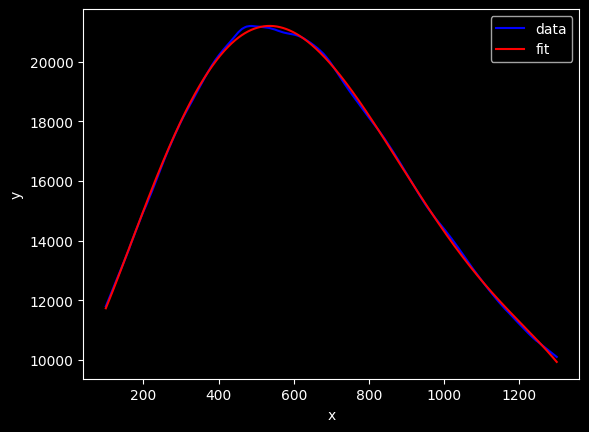

In [20]:
# Now we will fit the data using a polynomial function

def plot_poly_fit(x,y, order = 5):
    # Fit the data using a polynomial function
    z = np.polyfit(x, y, order)
    p = np.poly1d(z)

    # Plot the data and the fitted curve
    plt.plot(x, y, 'b-', label='data')
    plt.plot(x, p(x), 'r-', label='fit')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    return x , p(x), z;

a,b,z = plot_poly_fit(gx, gy, order = 5)

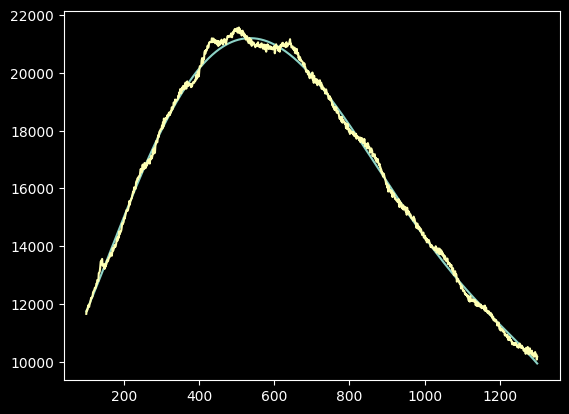

In [26]:
plt.plot(a,b)
plt.plot(spectrum.croppedx,spectrum.croppedy)

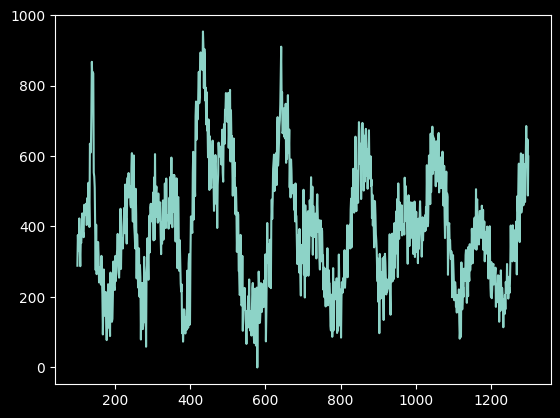

In [30]:
ry = spectrum.croppedy - b
ryn = ry + abs(min(ry))
plt.plot(spectrum.croppedx,ryn)

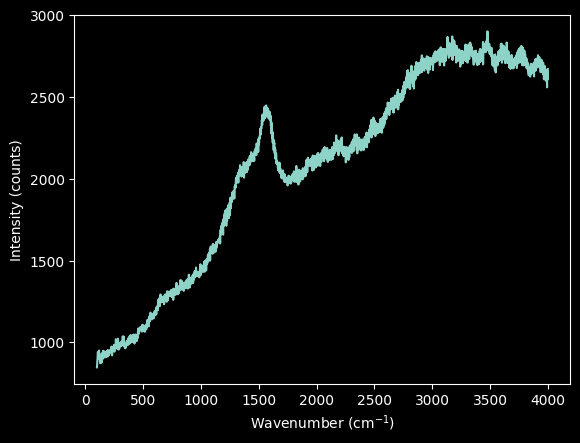

[1075.1129370629376, 1083.3310023310023, 1088.152459207459, 1089.777703962704, 1088.7742657342658]
[2104.4229603729605, 2099.5452214452216, 2094.7397435897437, 2094.70578088578, 2106.4993706293676]
<class 'list'> <class 'numpy.ndarray'>
The lenghts 10 10
Amplitudes: [ 870.65437003  334.94948719 -610.53079761]
Centers: [1551.32655359 1573.88912134 1631.20168706]
Sigmas: [213.55696934  48.08111548 178.55098955]


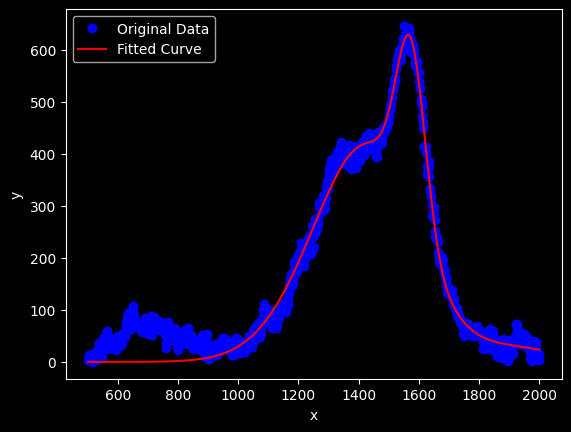

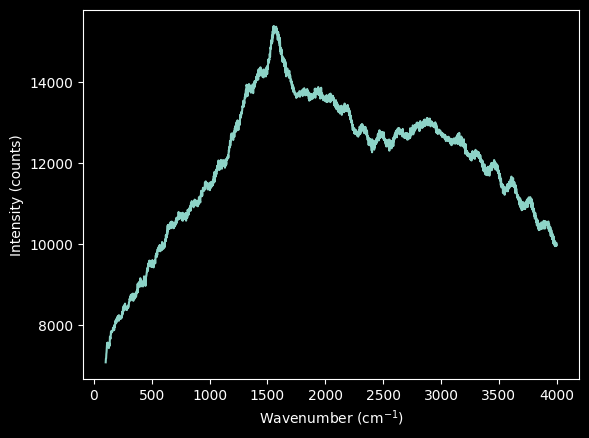

[9427.18895104896, 9493.481048951058, 9527.165582750591, 9534.366025641033, 9522.188368298373]
[13586.022377622383, 13562.417249417256, 13546.36107226108, 13561.698135198134, 13641.233566433548]
<class 'list'> <class 'numpy.ndarray'>
The lenghts 10 10
Amplitudes: [  897.45370206 -2150.54067069  3446.94115942]
Centers: [1288.28578054 1453.81400748 1475.30596314]
Sigmas: [489.60607076  73.9680334  126.03344888]


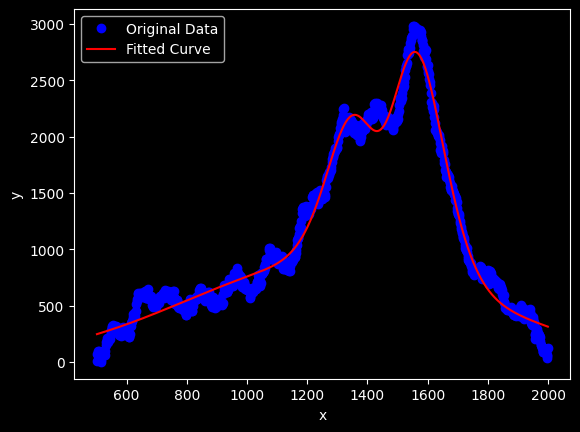

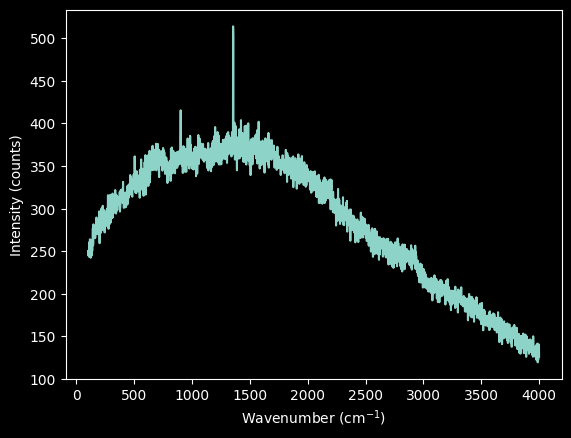

[327.7605944055945, 343.3295501165503, 342.49174592074604, 335.01408158508167, 327.6424778554779]
[339.14889510489513, 336.03723659673665, 333.94256526806527, 336.29034731934723, 347.73332167832154]
<class 'list'> <class 'numpy.ndarray'>
The lenghts 10 10
Amplitudes: [25.46624916 -8.69034683 53.07779148]
Centers: [ 763.55377574 1499.69767029 1420.00670465]
Sigmas: [197.34334073  22.57955918 351.71660448]


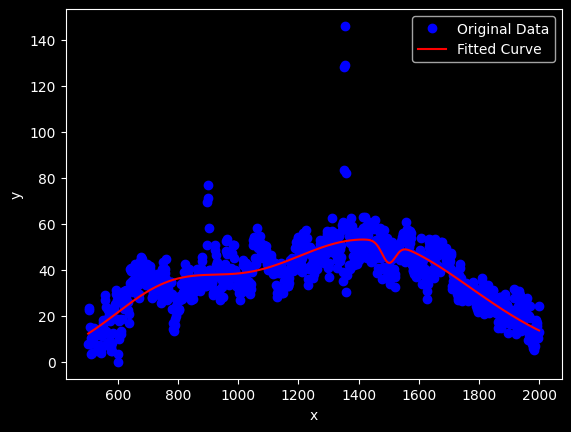

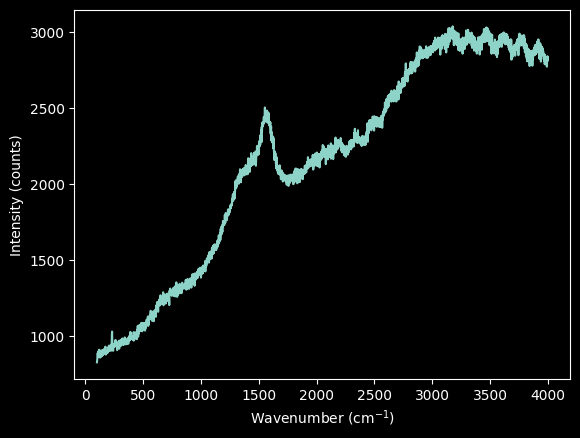

[1049.6427272727271, 1067.8128438228441, 1069.9769463869468, 1067.217505827506, 1066.3728671328674]
[2152.330792540793, 2148.412937062938, 2150.482494172495, 2156.9226806526804, 2163.5118181818148]
<class 'list'> <class 'numpy.ndarray'>
The lenghts 10 10
Amplitudes: [ 1306.27840482   337.27874381 -1041.01871937]
Centers: [1569.4182961  1573.3336244  1620.30424808]
Sigmas: [210.45003145  45.89135816 186.08713214]


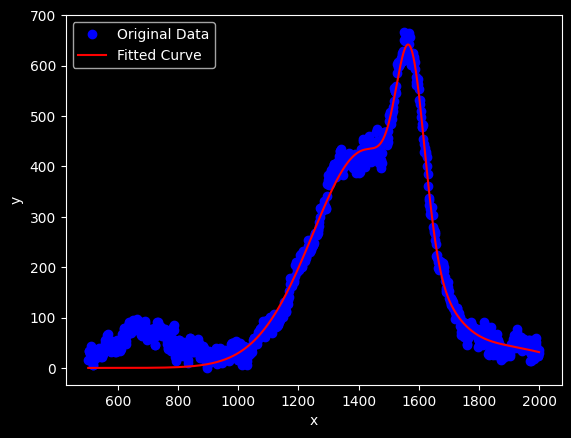

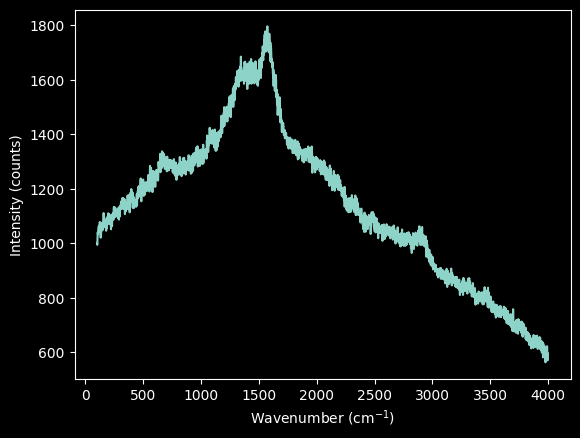

[1194.2798601398604, 1176.731958041958, 1186.3064918414916, 1203.5139044289044, 1215.3898834498834]
[1294.8939627039629, 1298.7706293706296, 1303.2178088578087, 1308.085151515151, 1312.8411888111875]
<class 'list'> <class 'numpy.ndarray'>
The lenghts 10 10
Amplitudes: [ 151.68428353 -897.76106094 1145.09597448]
Centers: [1215.44740452 1456.62707875 1464.13138843]
Sigmas: [495.33717557  85.90723089 112.23217512]


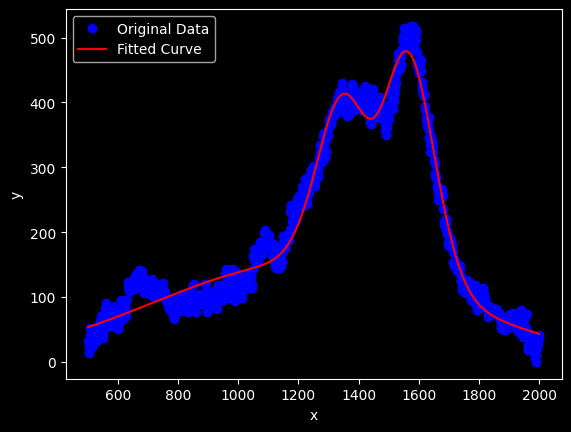

<Figure size 640x480 with 0 Axes>

In [24]:
for file in files:
    raman = RamanSpectrum(file)
    raman.plot()
    raman.crop(500,2000)
    raman.sav_gol(10,4)
    raman.baseline()
    raman.get_fitting(show=True, f2 = 0.5, f3 = 0.4 , c1=1600, c2 = 1500, c3 = 1400, s1 = 100, s2 = 50, s3 = 200) 

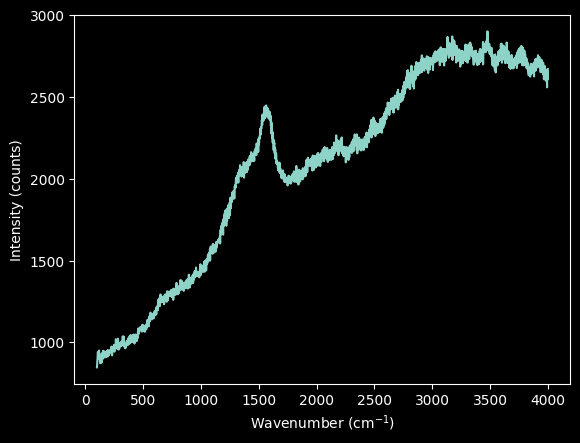

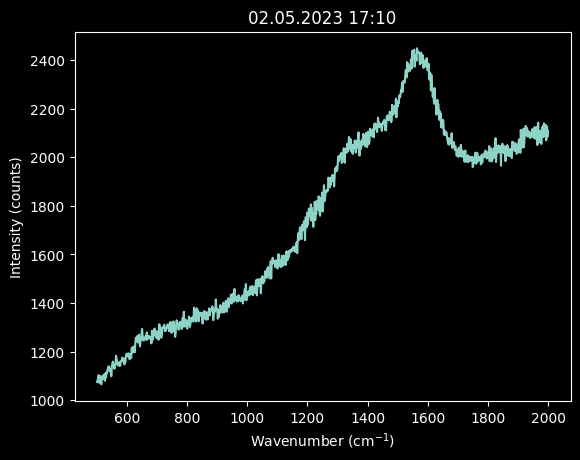

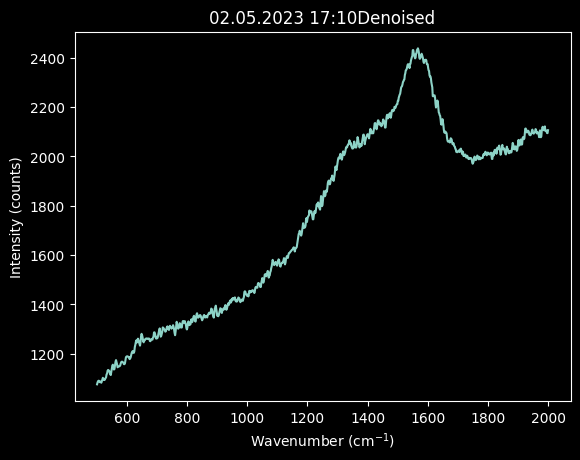

[1075.1129370629376, 1083.3310023310023, 1088.152459207459, 1089.777703962704, 1088.7742657342658]
[2104.4229603729605, 2099.5452214452216, 2094.7397435897437, 2094.70578088578, 2106.4993706293676]
<class 'list'> <class 'numpy.ndarray'>
The lenghts 10 10


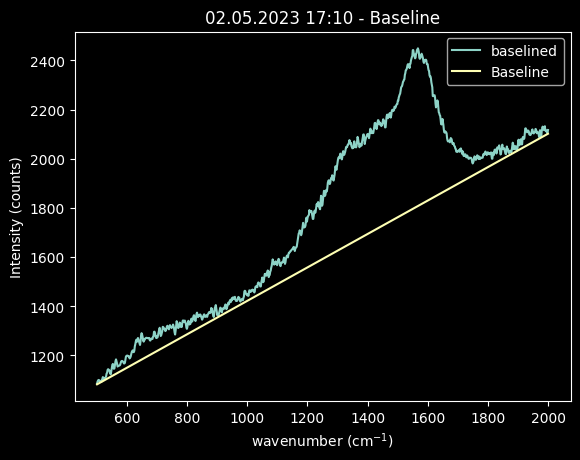

Amplitudes: [ 870.65437003  334.94948719 -610.53079761]
Centers: [1551.32655359 1573.88912134 1631.20168706]
Sigmas: [213.55696934  48.08111548 178.55098955]


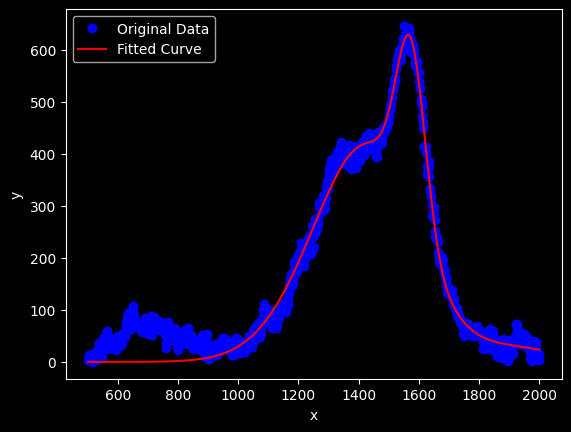

<Figure size 640x480 with 0 Axes>

In [22]:
raman = RamanSpectrum(files[0])
raman.plot()
raman.crop(500,2000, show=True)
raman.sav_gol(10,4, show=True)
raman.baseline(show=True)
raman.get_fitting(show=True, f2 = 0.5, f3 = 0.4 , c1=1600, c2 = 1500, c3 = 1400, s1 = 100, s2 = 50, s3 = 200) 

Amplitudes: [   324.84401602 -31733.18632801    412.78888248]
Centers: [ 1572.78239159 -2366.12900486  1428.47076174]
Sigmas: [  46.1966612  -320.68235679  175.36239238]


/home/codespace/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


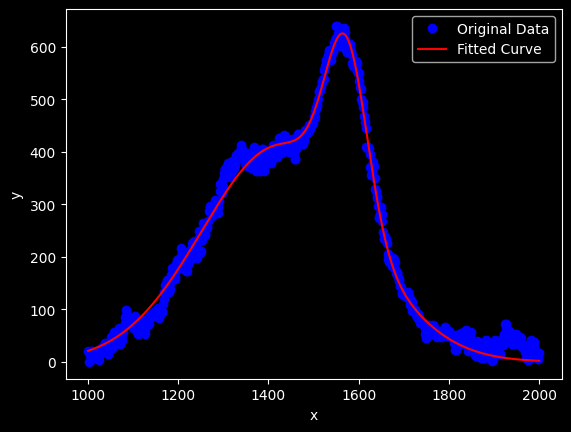

<Figure size 640x480 with 0 Axes>

In [12]:
spec.get_fitting(show = True, f2 = 1, f3 = 1 , c1= 800, c2 = 600, c3 = 800, s1 = 100, s2 = 100, s3 = 200)

In [5]:
for file in files:
    sp = RamanSpectrum(file)
    sp.crop(400,600)
    sp.sav_gol(10,4)
    sp.baseline()
    sp.get_fitting()

[51211.72027972031, 51524.60139860142, 51673.77389277391, 51759.1491841492, 51847.08624708627]
[58056.384615384624, 58030.35314685315, 57954.66317016316, 57859.88111888109, 57797.54545454539]
<class 'list'> <class 'numpy.ndarray'>
The lenghts 10 10
Amplitudes: [1974.4627635   641.29746369  953.25843784]
Centers: [465.35342817 499.70215435 516.1173427 ]
Sigmas: [60.66938636  7.48497803  7.55947204]
[52229.020979021, 52519.16083916087, 52696.382284382315, 52818.391608391634, 52925.97202797205]
[58990.20979020982, 59052.403263403285, 59066.23076923078, 59075.12820512818, 59154.489510489424]
<class 'list'> <class 'numpy.ndarray'>
The lenghts 10 10
Amplitudes: [1790.57931675  542.20292529  944.78122133]
Centers: [455.2631178  494.49811876 513.95120506]
Sigmas: [53.52885771 -6.74961943 10.01397788]
[8192.986013986021, 8212.482517482522, 8233.5372960373, 8251.600233100238, 8265.023310023318]
[9087.790209790213, 9125.004662004669, 9156.268065268072, 9150.177156177158, 9062.53146853146]
<class 

<Figure size 640x480 with 0 Axes>

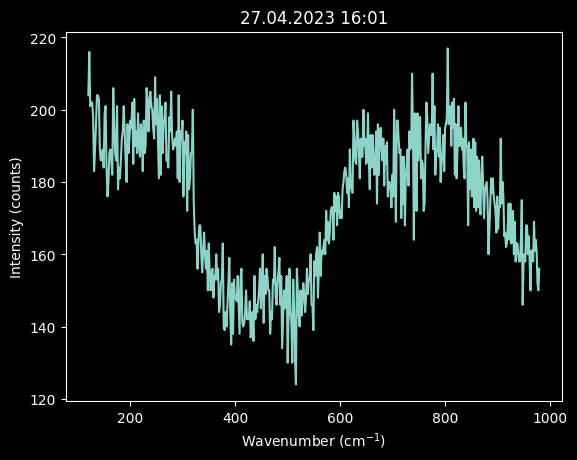

<Figure size 640x480 with 0 Axes>

In [10]:
spectrum = RamanSpectrum(files[0])
spectrum.crop(120,980, show=True)

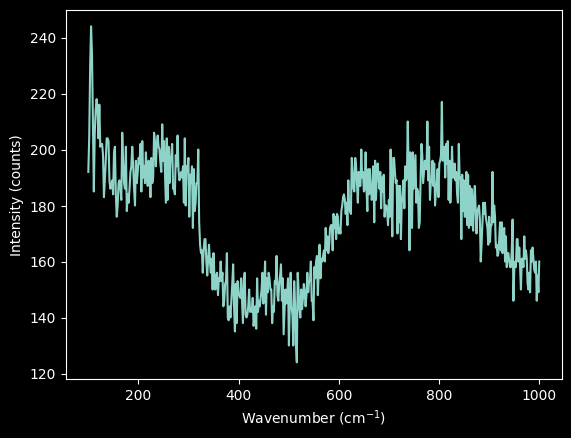

In [8]:
spectrum.plot()

In [14]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the function as the sum of three Gaussian curves
def gaussian(x, amplitude, center, sigma):
    return amplitude * np.exp(-(x - center)**2 / (2 * sigma**2))

def multi_peak_fit(x, *params):
    num_peaks = len(params) // 3
    y_fit = np.zeros_like(x)
    for i in range(num_peaks):
        amplitude, center, sigma = params[i*3 : (i+1)*3]
        y_fit += gaussian(x, amplitude, center, sigma)
    return y_fit

yspec = max(y)
yspec2 = yspec*(0.5)
yspec3 = yspec*(0.3)

# Perform the multi-peak fitting
initial_guess = [yspec3, 480, 10, yspec2, 500, 10, yspec, 520, 10]  # Initial guess for parameters: [amplitude1, center1, sigma1, amplitude2, center2, sigma2, amplitude3, center3, sigma3]
popt, pcov = curve_fit(multi_peak_fit, x, y, p0=initial_guess)

# Extract the optimized parameters
amplitudes = popt[0::3]
centers = popt[1::3]
sigmas = popt[2::3]

# Print the results

print('Amplitudes: {}'.format(amplitudes))
print('Centers: {}'.format(centers))
print('Sigmas: {}'.format(sigmas))

# Generate the fitted curve
x_fit = np.linspace(x.min(), x.max(), 1000)
y_fit = multi_peak_fit(x_fit, *popt)

# Plot the original data and the fitted curve
plt.plot(x, y, 'bo', label='Original Data')
plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.

['Si_nano_muestra_3/baseline//21.03.2023 10:08.png']


Button(description='Previous', style=ButtonStyle())

Button(description='Next', style=ButtonStyle())

Output()

In [2]:
############

# Obtenemos todos los espectros Raman

############

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

path = "../raman_2/"
files = []

for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
            files.append(r+'/'+file)

print(files)

current = ''

# Create the interactive plot
@interact
def plot_function(function=Dropdown(options=files)):
    ob = RamanSpectrum(function)
    plt.plot(ob.x, ob.y)
    plt.title(function)
    plt.show()

['../raman_2//Si_nano_muestra 3_25.txt', '../raman_2//Si_nano_muestra 3_16.txt', '../raman_2//Si_nano_muestra 3_63.txt', '../raman_2//Si_nano_muestra 3_01.txt', '../raman_2//Si_nano_muestra 3_64.txt', '../raman_2//Si_nano_muestra 3_31.txt', '../raman_2//Si_nano_muestra 3_46.txt', '../raman_2//Si_nano_muestra 3_59.txt', '../raman_2//Si_nano_muestra 3_57.txt', '../raman_2//Si_nano_muestra 3_38.txt', '../raman_2//Si_nano_muestra 3_62.txt', '../raman_2//Si_nano_muestra 3_48.txt', '../raman_2//Si_nano_muestra 3_37.txt', '../raman_2//Si_nano_muestra 3_34.txt', '../raman_2//Si_nano_muestra 3_33.txt', '../raman_2//Si_nano_muestra 3_17.txt', '../raman_2//Si_nano_muestra 3_65.txt', '../raman_2//Si_nano_muestra 3_52.txt', '../raman_2//Si_nano_muestra 3_32.txt', '../raman_2//Si_nano_muestra 3_60.txt']


interactive(children=(Dropdown(description='function', options=('../raman_2//Si_nano_muestra 3_25.txt', '../ra…

In [3]:
specs = []

for f in files:
    s = RamanSpectrum(f)
    s.crop(400, 570)
    s.sav_gol(20, 3)
    s.baseline()
    specs.append(s)

<Figure size 640x480 with 0 Axes>

In [11]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

cents = []

# Define the function as the sum of three Gaussian curves
def gaussian(x, amplitude, center, sigma):
    return amplitude * np.exp(-(x - center)**2 / (2 * sigma**2))

def multi_peak_fit(x, *params):
    num_peaks = len(params) // 3
    y_fit = np.zeros_like(x)
    for i in range(num_peaks):
        amplitude, center, sigma = params[i*3 : (i+1)*3]
        y_fit += gaussian(x, amplitude, center, sigma)
    return y_fit

for spec in specs:
    x = np.array(spec.basedx)
    y = np.array(spec.basedy)

    yspec = max(y)
    yspec2 = yspec*(0.8)
    yspec3 = yspec*(0.6)

    # Perform the multi-peak fitting
    initial_guess = [yspec3, 450, 100, yspec2, 510, 10, yspec, 520, 10]  # Initial guess for parameters: [amplitude1, center1, sigma1, amplitude2, center2, sigma2, amplitude3, center3, sigma3]
    try:
        popt, pcov = curve_fit(multi_peak_fit, x, y, p0=initial_guess)

        # Extract the optimized parameters
        amplitudes = popt[0::3]
        centers = popt[1::3]
        cents.append(centers)
        sigmas = popt[2::3]

        # Print the results

        print('Amplitudes: {}'.format(amplitudes))
        print('Centers: {}'.format(centers))
        print('Sigmas: {}'.format(sigmas))

        # Generate the fitted curve
        x_fit = np.linspace(x.min(), x.max(), 1000)
        y_fit = multi_peak_fit(x_fit, *popt)

        # Plot the original data and the fitted curve
        plt.plot(x, y, 'bo', label='Original Data')
        plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve')
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.savefig('fit/{}.png'.format(spec.metadata['Date']))
        plt.clf()
    except:
        print('Sin ajuste para...')
        print(spec.metadata['Date'])

Amplitudes: [2161.66057163  523.3274612   897.78695567]
Centers: [477.50236651 499.33407887 515.43424425]
Sigmas: [63.91827257  6.8807121   7.95138513]
Amplitudes: [2076.03885841  519.08446     651.71147672]
Centers: [478.89489625 498.34517198 515.39058629]
Sigmas: [68.15380195  7.59533809  6.8180719 ]
Sin ajuste para...
21.03.2023 11:43
Amplitudes: [636.80150874 377.74351181 695.48034326]
Centers: [471.18918329 499.66687223 517.39452531]
Sigmas: [53.02823629 11.13031359  6.60393675]
Amplitudes: [ 596.98447513 1098.61025765 1161.19476618]
Centers: [441.40465588 497.21040887 516.75558642]
Sigmas: [20.85717729 19.99485334  6.53535296]
Amplitudes: [1690.3430746   208.8722524   595.17398912]
Centers: [478.87219689 491.64758208 510.26218806]
Sigmas: [68.40366125  4.8206734   9.15557129]
Amplitudes: [1968.5735314   605.66167336  802.54229218]
Centers: [477.58015107 499.95289217 515.72164087]
Sigmas: [68.41807354  6.53667575  6.84390494]
Amplitudes: [1903.94731236  762.52260924 1528.38617854]

<Figure size 640x480 with 0 Axes>

477.50236650538875 499.33407887095143 515.4342442520125
478.89489624531905 498.3451719832982 515.3905862869067
471.1891832942043 499.66687222551747 517.3945253058323
441.40465587517207 497.2104088684504 516.7555864242073
478.87219688959533 491.64758207558106 510.2621880638608
477.5801510675861 499.9528921741041 515.7216408706062
474.2303471842054 501.0057548718852 517.1527988447167
476.63508884207477 499.64460176864935 516.6162889160108
477.44332393545227 504.08823019637185 518.9697962039651
444.4524763654444 500.51894485852006 517.2550567655771
477.97240093337325 497.6845137792547 514.6666698128879
477.8422261258001 503.3639271185607 518.6109424892719
477.8178280538169 497.8144387072764 514.5589182369746
478.05350742262516 502.29569228451084 517.4542431813509
478.11461382098406 498.62583850758614 515.2862986936976
498.6142953510867 444.2079651635559 516.7776217291085
477.41023073057346 502.2220611735366 517.0520062225587
478.3339262791579 499.708448777784 515.8123349589368
474.4967545

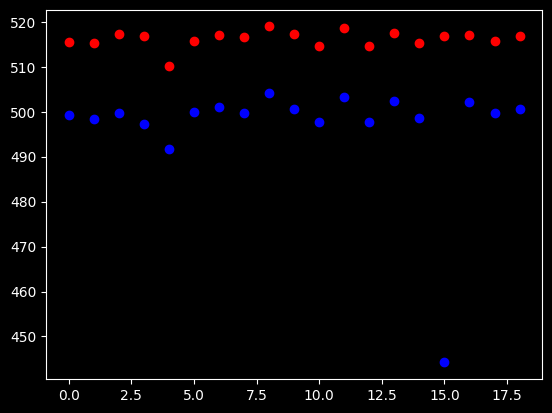

In [13]:
i = 0

x = []
ax = []
ay = []

for a,b,c in cents:
    x.append(i)
    print(a,b,c)
    ax.append(b)
    ay.append(c)
    i += 1

plt.plot(x, ax, 'bo', label='Centers')
plt.plot(x, ay, 'ro', label='Sigmas')

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the function as the sum of three Gaussian curves
def gaussian(x, amplitude, center, sigma):
    return amplitude * np.exp(-(x - center)**2 / (2 * sigma**2))

def multi_peak_fit(x, *params):
    num_peaks = len(params) // 3
    y_fit = np.zeros_like(x)
    for i in range(num_peaks):
        amplitude, center, sigma = params[i*3 : (i+1)*3]
        y_fit += gaussian(x, amplitude, center, sigma)
    return y_fit

# Perform the multi-peak fitting
initial_guess = [500, 450, 100, 700, 510, 10, 1400, 520, 10]  # Initial guess for parameters: [amplitude1, center1, sigma1, amplitude2, center2, sigma2, amplitude3, center3, sigma3]
popt, pcov = curve_fit(multi_peak_fit, x, y, p0=initial_guess)

# Extract the optimized parameters
amplitudes = popt[0::3]
centers = popt[1::3]
sigmas = popt[2::3]

# Print the results

print('Amplitudes: {}'.format(amplitudes))
print('Centers: {}'.format(centers))
print('Sigmas: {}'.format(sigmas))

# Generate the fitted curve
x_fit = np.linspace(x.min(), x.max(), 1000)
y_fit = multi_peak_fit(x_fit, *popt)

# Plot the original data and the fitted curve
plt.plot(x, y, 'bo', label='Original Data')
plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

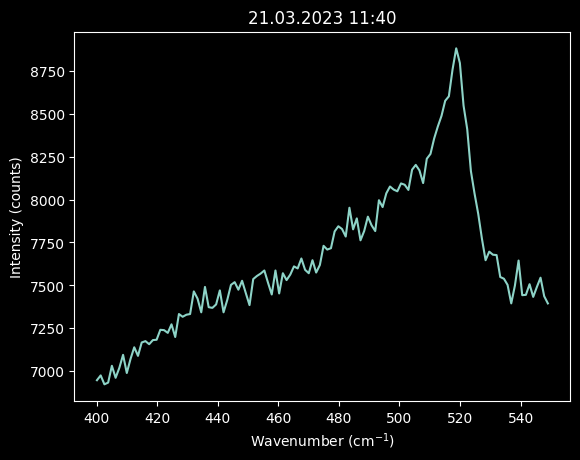

<Figure size 640x480 with 0 Axes>

In [7]:
s1 = RamanSpectrum(files[10])

s1.crop(400, 550, show=True)

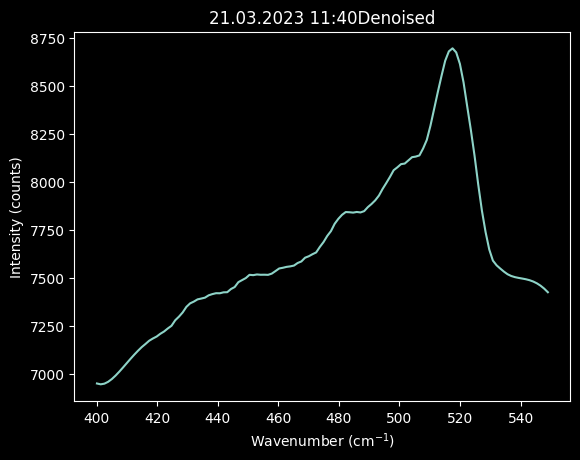

<Figure size 640x480 with 0 Axes>

In [8]:
s1.sav_gol(25, 4, show=True)

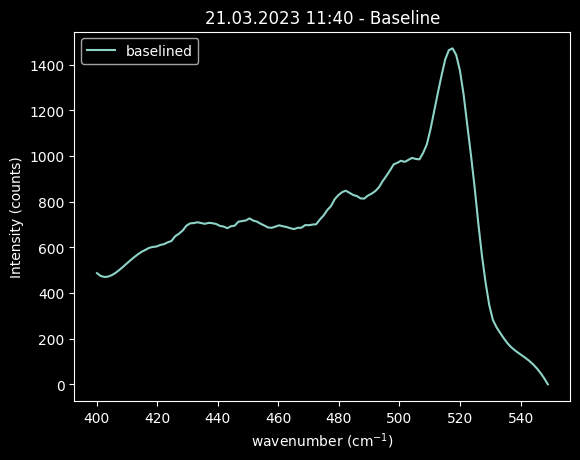

FileNotFoundError: [Errno 2] No such file or directory: 'baselined/21.03.2023 11:40.png'

<Figure size 640x480 with 0 Axes>

In [9]:
s1.baseline(show=True, before=False)

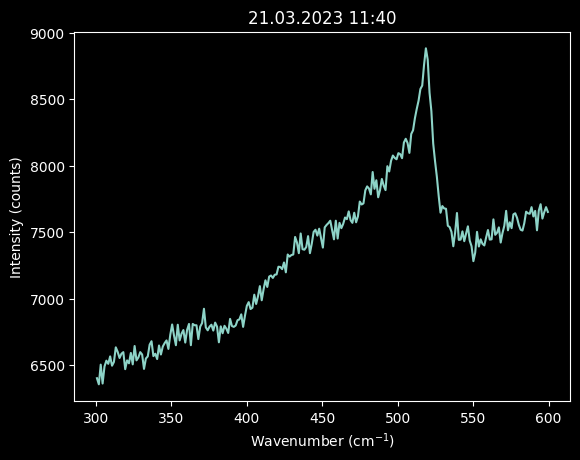

<Figure size 640x480 with 0 Axes>

In [10]:
spectrum = RamanSpectrum(files[10])
spectrum.crop(300, 600, show=True)

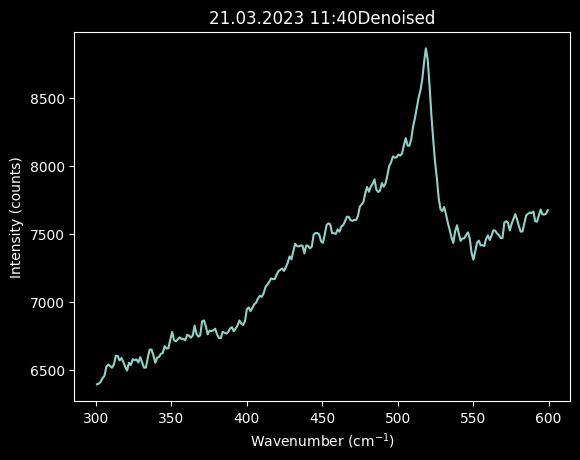

<Figure size 640x480 with 0 Axes>

In [11]:
spectrum.sav_gol(5, 2, show=True)

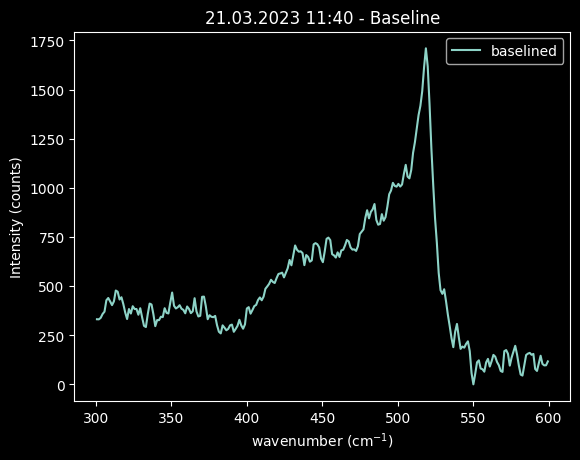

FileNotFoundError: [Errno 2] No such file or directory: 'baselined/21.03.2023 11:40.png'

<Figure size 640x480 with 0 Axes>

In [13]:
spectrum.baseline(show=True, before=False)

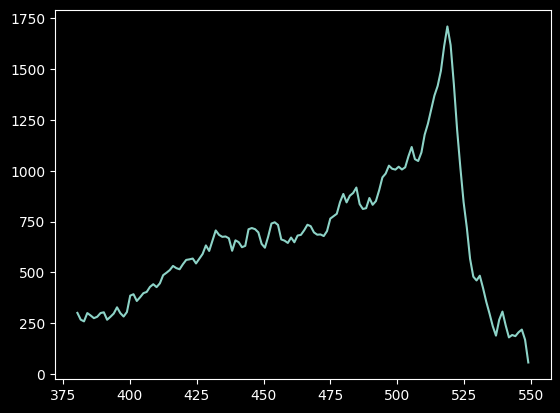

In [19]:
x = []
y = []

for a,b in zip(spectrum.basedx, spectrum.basedy):
    if a > 380 and a < 550:
        x.append(a)
        y.append(b)
x = np.array(x)
y = np.array(y)

plt.plot(x, y)
plt.show()


Amplitudes: [695.54042325 617.989882   862.63865873]
Centers: [455.34635454 506.41873279 518.52114283]
Sigmas: [49.39429515 16.08516524  4.24004969]


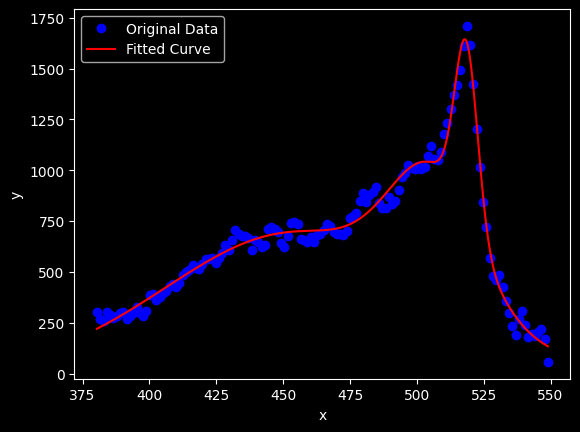

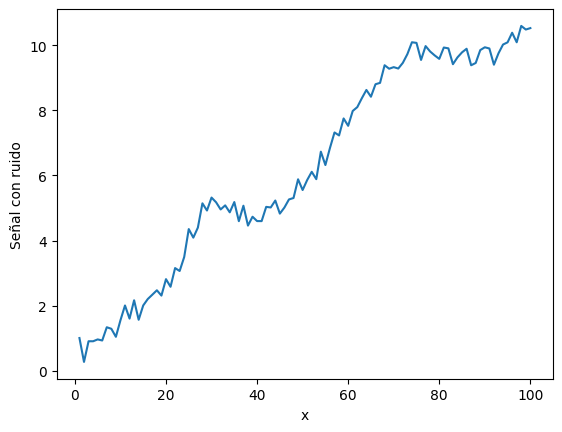

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de los parámetros de las curvas gaussianas
amplitud_1 = 1.5
media_1 = 30
desviacion_1 = 5

amplitud_2 = 2.0
media_2 = 70
desviacion_2 = 10

# Definición de la línea base recta
pendiente = 0.1
intercepto = 0.5

# Creación del intervalo x
x = np.linspace(1, 100, 100)

# Generación de las curvas gaussianas y la línea base
gaussiana_1 = amplitud_1 * np.exp(-(x - media_1)**2 / (2 * desviacion_1**2))
gaussiana_2 = amplitud_2 * np.exp(-(x - media_2)**2 / (2 * desviacion_2**2))
linea_base = pendiente * x + intercepto

# Generación del ruido aleatorio
ruido = np.random.normal(0, 0.2, len(x))

# Construcción de la señal con ruido
s = gaussiana_1 + gaussiana_2 + linea_base + ruido

# Visualización de la señal
plt.plot(x, s)
plt.xlabel('x')
plt.ylabel('Señal con ruido')
plt.show()


In [7]:
x,s

(array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
         34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
         45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
         56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
         67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
         78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
         89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
        100.]),
 array([ 1.00186475,  0.26717584,  0.9029145 ,  0.90240926,  0.95895806,
         0.92612636,  1.33298466,  1.28648717,  1.03919388,  1.54673448,
         2.00257026,  1.59911477,  2.162407  ,  1.56308388,  2.0031752 ,
         2.20078973,  2.3342046 ,  2.46975362,  2.30658575,  2.81175032,
         2.57780278,  3.15

In [ ]:
# Now that we have X, S and the base line we compute the 

In [27]:
############

# Ejecutando procedimientos en los espectros

############

specs = []

for f in files:
    s = RamanSpectrum(f)
    s.crop(300, 600)
    s.sav_gol(25, 4)
    s.baseline()
    specs.append(s)

<Figure size 640x480 with 0 Axes>

['baseline//base21.03.2023 11:19.png', 'baseline//base21.03.2023 11:09.png', 'baseline//base21.03.2023 10:46.png', 'baseline//base21.03.2023 10:08.png', 'baseline//base21.03.2023 11:46.png', 'baseline//base21.03.2023 11:10.png', 'baseline//base21.03.2023 11:07.png', 'baseline//base21.03.2023 11:04.png', 'baseline//base21.03.2023 11:36.png', 'baseline//base21.03.2023 11:43.png', 'baseline//base21.03.2023 11:44.png', 'baseline//base21.03.2023 11:32.png', 'baseline//base21.03.2023 11:40.png', 'baseline//base21.03.2023 11:22.png', 'baseline//base21.03.2023 10:31.png', 'baseline//base21.03.2023 11:27.png', 'baseline//base21.03.2023 10:57.png', 'baseline//base21.03.2023 11:03.png', 'baseline//base21.03.2023 11:34.png']


Button(description='Previous', style=ButtonStyle())

Button(description='Next', style=ButtonStyle())

Output()

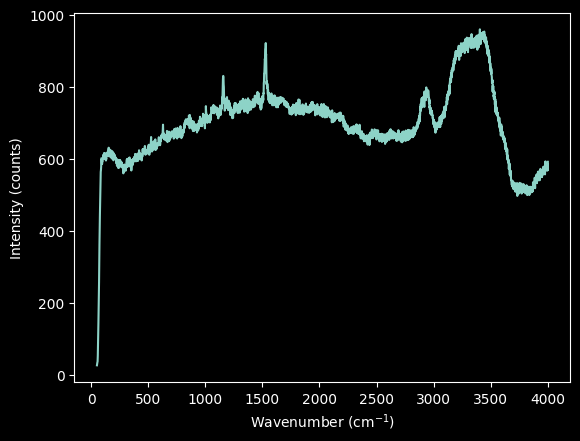

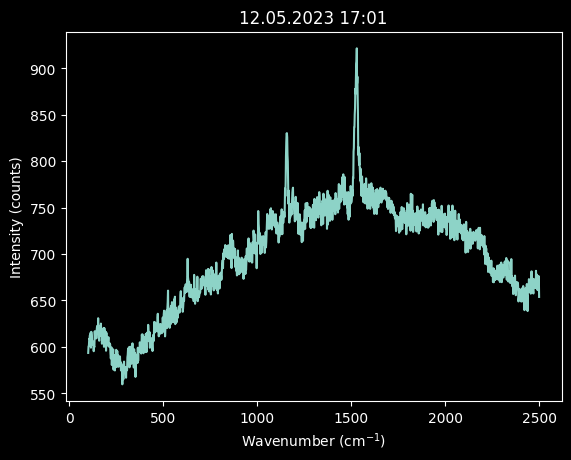

<Figure size 640x480 with 0 Axes>

In [6]:
raman = RamanSpectrum(files[4])
raman.plot()
raman.crop(100,2500, show = True)

In [7]:
############

# Inspeccionando espectros para conocer el orden del polinomio y el tamaño de la ventana

############


from scipy.signal import savgol_filter, wiener, medfilt
import matplotlib.pyplot as plt
import ipywidgets as widgets


#######################3


x = raman.croppedx
y = raman.croppedy

# Denoise the signal using three different methods
# y_savgol = savgol_filter(y, window_length=20, polyorder=1)
y_wiener = wiener(y)
y_medfilt = medfilt(y)


x1, x2 = min(x), max(x)
y1, y2 = min(y), max(y)

########################

def plot_functions(x_range, y_range, pord, wind):
    y_savgol = savgol_filter(y, window_length=wind, polyorder=pord)
    plt.plot(x, y, linestyle= '-', linewidth = 1 ,color='blue', label='Original')
    plt.plot(x, y_medfilt, linewidth = 4, color='green', label='Median Filter')
    plt.plot(x, y_wiener, linewidth = 2, color='yellow', label='Wiener')
    plt.plot(x, y_savgol, linewidth = 4, color='red', label='Savitzky-Golay')
    plt.ylim(y_range)
    plt.xlim(x_range)
    plt.legend()
    plt.show()

x_slider = widgets.FloatRangeSlider(
    value=[x1, x2],
    min=x1,
    max=x2,
    step=40,
    description='X range:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

y_slider = widgets.FloatRangeSlider(
    value=[y1, y2],
    min=y1,
    max=y2,
    step=10,
    description='Y range:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

pord_s = widgets.IntSlider(
    value=8,
    min=1,
    max=20,
    step=1,
    description='Pord:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

wind_s = widgets.IntSlider(
    value=20,
    min=2,
    max=50,
    step=1,
    description='Wind:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)


def update_plot(x_range, y_range, prange, wrange):
    plot_functions(x_range, y_range, prange, wrange)

interactive_plot = widgets.interactive_output(update_plot, {'x_range': x_slider, 'y_range': y_slider, 'prange': pord_s, 'wrange': wind_s})

display(widgets.VBox([x_slider, y_slider, pord_s, wind_s, interactive_plot]))


['./cropped/cropped21.03.2023 11:07.png', './cropped/cropped21.03.2023 11:32.png', './cropped/cropped21.03.2023 11:27.png', './cropped/cropped21.03.2023 11:22.png', './cropped/cropped21.03.2023 11:19.png', './cropped/cropped21.03.2023 10:57.png', './cropped/cropped21.03.2023 10:46.png', './cropped/cropped21.03.2023 11:10.png', './cropped/cropped21.03.2023 10:31.png', './cropped/cropped21.03.2023 11:43.png', './cropped/cropped21.03.2023 11:46.png', './cropped/cropped21.03.2023 11:34.png', './cropped/cropped21.03.2023 11:03.png', './cropped/cropped21.03.2023 11:44.png', './cropped/cropped21.03.2023 11:40.png', './cropped/cropped21.03.2023 11:36.png', './cropped/cropped21.03.2023 11:04.png', './cropped/cropped21.03.2023 11:09.png', './cropped/cropped21.03.2023 10:08.png']


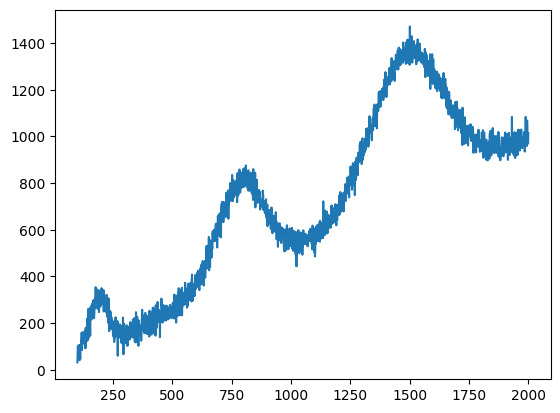

In [16]:

import numpy as np
import matplotlib.pyplot as plt

def generate_signal(amplitude1, mean1, std1, amplitude2, mean2, std2, amplitude3, mean3, std3):
    x = np.linspace(100, 2000, 1901)  # Generate x values in the range (100, 2000)

    # Generate the Gaussian profiles
    gaussian1 = amplitude1 * np.exp(-(x - mean1) ** 2 / (2 * std1 ** 2))
    gaussian2 = amplitude2 * np.exp(-(x - mean2) ** 2 / (2 * std2 ** 2))
    gaussian3 = amplitude3 * np.exp(-(x - mean3) ** 2 / (2 * std3 ** 2))

    # Add noise to the function
    noise = np.random.normal(0, 30, len(x))
    function = gaussian1 + gaussian2 + gaussian3 + noise

    return x, function

xx, yy = generate_signal(222, 188, 40, 422, 788, 100, 622, 1488, 150)
zz = 0.5*xx + yy
plt.plot(xx, zz)

In [20]:
xx = s1.denoisedx
yy = s1.denoisedy

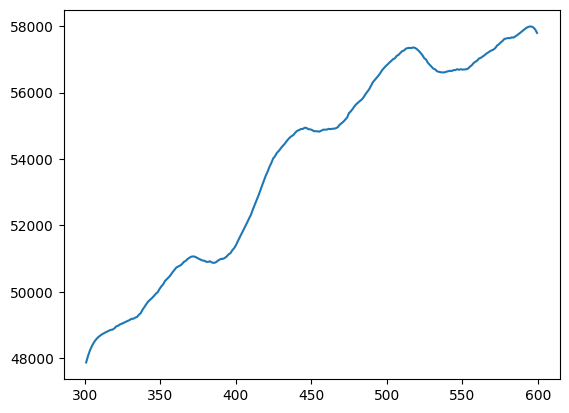

In [22]:
plt.plot(xx, yy)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def estimate_baseline(f, window_size=100):
    # Calculate the rolling mean as the baseline
    baseline = np.convolve(f, np.ones(window_size)/window_size, mode='same')
    return baseline

def plot_signal_with_baseline_correction(window_size):
    # Estimate the baseline
    # zz
    baseline = estimate_baseline(yy, window_size)

    # Correct the signal by subtracting the baseline
    corrected_signal = yy - baseline

    # Plot the original and corrected signals
    plt.figure(figsize=(8, 6))
    plt.plot(xx, yy, label='Original Signal')
    plt.plot(xx, corrected_signal, label='Corrected Signal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Signal with Baseline Correction')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming x and y are defined variables as you mentioned
# x and y are assumed to be numpy arrays

# Create an interactive slider for window size
window_size_slider = IntSlider(min=1, max=len(xx), step=1, value=100, description='Window Size')

# Create the interactive plot
interact(plot_signal_with_baseline_correction, window_size=window_size_slider);

interactive(children=(IntSlider(value=100, description='Window Size', max=245, min=1), Output()), _dom_classes…

In [32]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from ipywidgets import interact

# Define a function to update the plot based on the input text and description
def update_plot(text, description):
    # Clear the previous plot
    plt.clf()

    # Generate data based on the input text
    x = np.linspace(0, 10, 100)
    y = np.sin(x) + text.count('a')  # Adjust the y-values based on the occurrence of 'a' in the text

    # Plot the data
    plt.plot(x, y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Interactive Plot: {description}')  # Include the description in the plot title

    # Display the updated plot
    plt.show()

# Create an interact function to control the text input and description
interact(update_plot, text='', description='')

# Display the input fields
display()


interactive(children=(Text(value='', description='text'), Text(value='', description='description'), Output())…